# Projet ML

In [1093]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### Importation des data

In [1094]:
# Classement des jeux vidéos par rapport à leur vente 
df = pd.read_csv("./data/vgsales-12-4-2019-short.csv", sep=",")

### Affichage des informations

In [1095]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   6536 non-null   float64
 8   User_Score     335 non-null    float64
 9   Total_Shipped  1827 non-null   float64
 10  Global_Sales   19415 non-null  float64
 11  NA_Sales       12964 non-null  float64
 12  PAL_Sales      13189 non-null  float64
 13  JP_Sales       7043 non-null   float64
 14  Other_Sales    15522 non-null  float64
 15  Year           54813 non-null  float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


Il y a 16 colonnes et 55 792 lignes dans ce dataset.

Description des colonnes :

- Rank - Rang selon le total des ventes
- Name - Nom du jeu vidéo
- Platform - Support utilisé par le jeu (ex: PC, PS4, XOne, etc.)
- Genre - Genre du jeu
- ESRB Rating - Catégories de classement proposant le groupe d’âge auquel le jeu convient
- Publisher - Editeur du jeu
- Developer - Développeur du jeu
- Critic Score - Score sur 10 du jeu selon des critiques
- User Score - Score sur 10 du jeu selon des joueurs
- Total Shipped - Nombre total de copies expédiées du jeu
- Global_Sales - Ventes mondiales totales (en millions)
- NA_Sales - Ventes en Amérique du Nord (en millions)
- PAL_Sales - Ventes en Europe (en millions)
- JP_Sales - Ventes au Japon (en millions)
- Other_Sales - Ventes dans le reste du monde (en millions)
- Year - Année de sortie du jeu


On peut voir que notre jeu de données est dans l'ensemble assez incomplet. Surtout, au niveau des notes données par les critiques et les joueurs, mais également au niveau des colonnes de ventes.

## Partie 1 : Analyse graphique des données (Dataviz)
- Diagrammes de répartition des données (type gaussienne sur les données)
- Vérification du nombre de données, si plusieurs données sont peu représentés (<3%) alors regrouper dans une seule et même catégorie, 1 pie chart avant/après
- Nettoyage des données manquantes, encodage (OneHot ou par dictionnaire)
- Boites à moustache avec données extrêmes
- Heatmap + observations sur les corrélations

## Nettoyage des données

Pour commencer le nettoyage, on supprime la colonne 'User_Score' puisque celle-ci possède seulement 335 valeurs non null sur 55 792 jeux. Elle ne nous sera donc pas très utile pour notre modèle.

In [1096]:
# Suppression de la colonne 'User_Score'
df = df.drop(['User_Score'], axis=1)
df.shape

(55792, 15)

Remplacement de toutes les valeurs null de la colonne 'Critic_Score' par la moyenne des valeurs déjà existantes
Remplacement de toutes les valeurs null de la colonne 'Global_Sales' par la moyenne des valeurs déjà existantes
Remplacement de toutes les valeurs null de la colonne 'Developer' par la valeur la plus utilisée dans cette colonne avec le mode
Remplacement de toutes les valeurs null de la colonne 'Year' par la moyenne des valeurs déjà existantes

In [1097]:
df.describe()

,Rank,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
count,55792.000000,6536.000000,1827.000000,19415.000000,12964.000000,13189.000000,7043.000000,15522.000000,54813.000000
mean,27896.500000,7.213709,1.887258,0.365503,0.275541,0.155263,0.110402,0.044719,2005.659095
std,16105.907446,1.454079,4.195693,0.833022,0.512809,0.399257,0.184673,0.129554,8.355585
min,1.000000,1.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.000000
25%,13948.750000,6.400000,0.200000,0.030000,0.050000,0.010000,0.020000,0.000000,2000.000000
50%,27896.500000,7.500000,0.590000,0.120000,0.120000,0.040000,0.050000,0.010000,2008.000000
75%,41844.250000,8.300000,1.800000,0.360000,0.290000,0.140000,0.120000,0.040000,2011.000000
max,55792.000000,10.000000,82.860000,20.320000,9.760000,9.850000,2.690000,3.120000,2020.000000


In [1098]:
# Remplacement de toutes les valeurs null de la colonne 'Critic_Score' par la moyenne des valeurs déjà existantes
df['Critic_Score'] = df['Critic_Score'].fillna(df['Critic_Score'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   55792 non-null  float64
 8   Total_Shipped  1827 non-null   float64
 9   Global_Sales   19415 non-null  float64
 10  NA_Sales       12964 non-null  float64
 11  PAL_Sales      13189 non-null  float64
 12  JP_Sales       7043 non-null   float64
 13  Other_Sales    15522 non-null  float64
 14  Year           54813 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.4+ MB


In [1099]:
# Remplacement de toutes les valeurs null de la colonne 'Global_Sales' par la moyenne des valeurs déjà existantes
df['Global_Sales'] = df['Global_Sales'].fillna(df['Global_Sales'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55775 non-null  object 
 7   Critic_Score   55792 non-null  float64
 8   Total_Shipped  1827 non-null   float64
 9   Global_Sales   55792 non-null  float64
 10  NA_Sales       12964 non-null  float64
 11  PAL_Sales      13189 non-null  float64
 12  JP_Sales       7043 non-null   float64
 13  Other_Sales    15522 non-null  float64
 14  Year           54813 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.4+ MB


In [1100]:
#Remplacement de toutes les valeurs null de la colonne 'Developer' par la valeur la plus utilisée dans cette colonne avec le mode
df['Developer'] = df['Developer'].fillna(df['Developer'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55792 non-null  object 
 7   Critic_Score   55792 non-null  float64
 8   Total_Shipped  1827 non-null   float64
 9   Global_Sales   55792 non-null  float64
 10  NA_Sales       12964 non-null  float64
 11  PAL_Sales      13189 non-null  float64
 12  JP_Sales       7043 non-null   float64
 13  Other_Sales    15522 non-null  float64
 14  Year           54813 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.4+ MB


In [1101]:
#Remplacement de toutes les valeurs null de la colonne 'Year' par la moyenne des valeurs déjà existantes
df['Year'] = df['Year'].fillna(df['Year'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           55792 non-null  int64  
 1   Name           55792 non-null  object 
 2   Genre          55792 non-null  object 
 3   ESRB_Rating    23623 non-null  object 
 4   Platform       55792 non-null  object 
 5   Publisher      55792 non-null  object 
 6   Developer      55792 non-null  object 
 7   Critic_Score   55792 non-null  float64
 8   Total_Shipped  1827 non-null   float64
 9   Global_Sales   55792 non-null  float64
 10  NA_Sales       12964 non-null  float64
 11  PAL_Sales      13189 non-null  float64
 12  JP_Sales       7043 non-null   float64
 13  Other_Sales    15522 non-null  float64
 14  Year           55792 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 6.4+ MB


Converstissons maintenant la colonne 'Year' en datetime.

In [1102]:
df['Year'] = df['Year'].astype(int)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rank           55792 non-null  int64         
 1   Name           55792 non-null  object        
 2   Genre          55792 non-null  object        
 3   ESRB_Rating    23623 non-null  object        
 4   Platform       55792 non-null  object        
 5   Publisher      55792 non-null  object        
 6   Developer      55792 non-null  object        
 7   Critic_Score   55792 non-null  float64       
 8   Total_Shipped  1827 non-null   float64       
 9   Global_Sales   55792 non-null  float64       
 10  NA_Sales       12964 non-null  float64       
 11  PAL_Sales      13189 non-null  float64       
 12  JP_Sales       7043 non-null   float64       
 13  Other_Sales    15522 non-null  float64       
 14  Year           55792 non-null  datetime64[ns]
dtypes: datetime64[ns](1

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86,0.12,NaN,NaN,NaN,NaN,2006-01-01
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,40.24,0.12,NaN,NaN,NaN,NaN,1985-01-01
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14,0.12,NaN,NaN,NaN,NaN,2008-01-01
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,7.5,36.60,0.12,NaN,NaN,NaN,NaN,2017-01-01
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09,0.12,NaN,NaN,NaN,NaN,2009-01-01


In [1103]:
print("Date de publication des jeux comprise entre le", df['Year'].min(), "et", df['Year'].max())

Date de publication des jeux comprise entre le 1970-01-01 00:00:00 et 2020-01-01 00:00:00



On supprime les colonnes dont les valeurs manquantes sont trop nombreuses et inutiles pour notre modèle.

Pour les ventes, on ne garde que la colonne 'Global_Sales' puisque cela correspond aux ventes mondiales et cette information est très importante pour le classement de ces jeux. 


In [1104]:
df_clean = df.drop(['ESRB_Rating', 'Total_Shipped', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          55792 non-null  int64         
 1   Name          55792 non-null  object        
 2   Genre         55792 non-null  object        
 3   Platform      55792 non-null  object        
 4   Publisher     55792 non-null  object        
 5   Developer     55792 non-null  object        
 6   Critic_Score  55792 non-null  float64       
 7   Global_Sales  55792 non-null  float64       
 8   Year          55792 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.8+ MB


## Analyse et visualisation des données

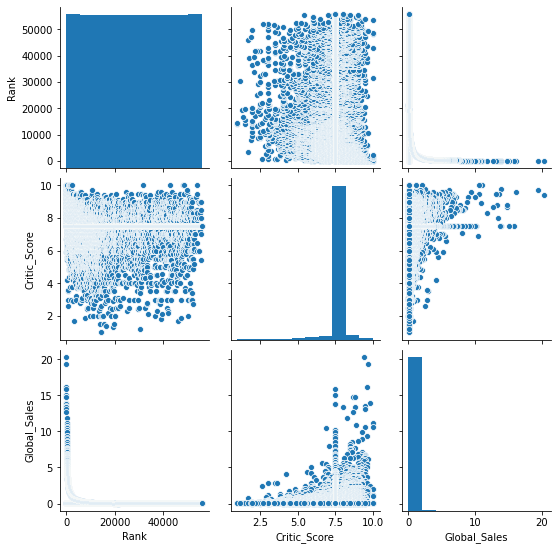

In [1105]:
sns.pairplot(df_clean)

Ce graphique nous permet de visualiser une première corrélation possible entre certaines colonnes.

Mais il manque la colonne 'Year'. Pour y remédier, nous allons prendre uniquement l'année des dates présentes dans la colonne.

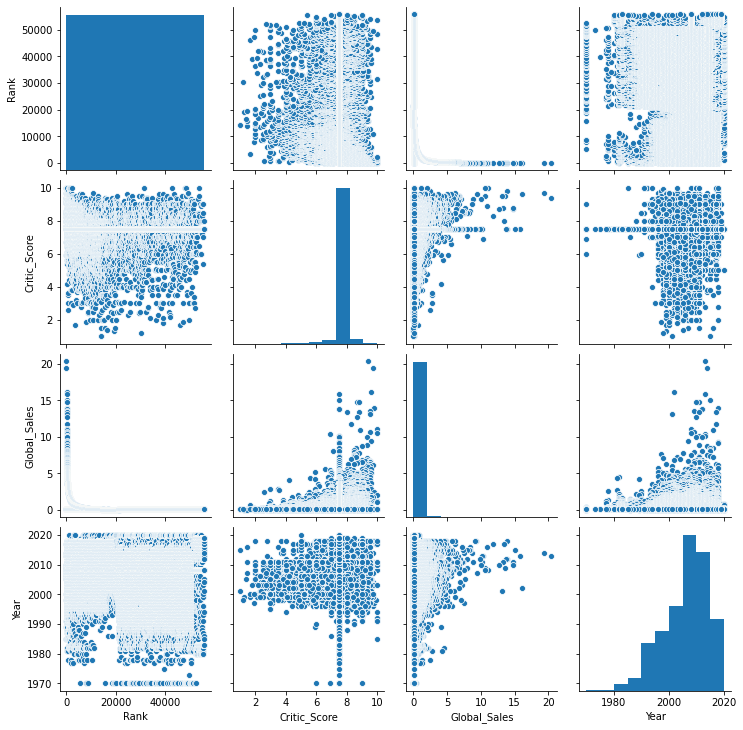

In [1106]:
df_clean['Year'] = df_clean['Year'].dt.year #Gardons uniquement l'année des dates
sns.pairplot(df_clean)

A présent, on affiche un graphique représentant la distribution par années des jeux vidéos présents dans ce dataset.

<AxesSubplot:xlabel='Year', ylabel='count'>

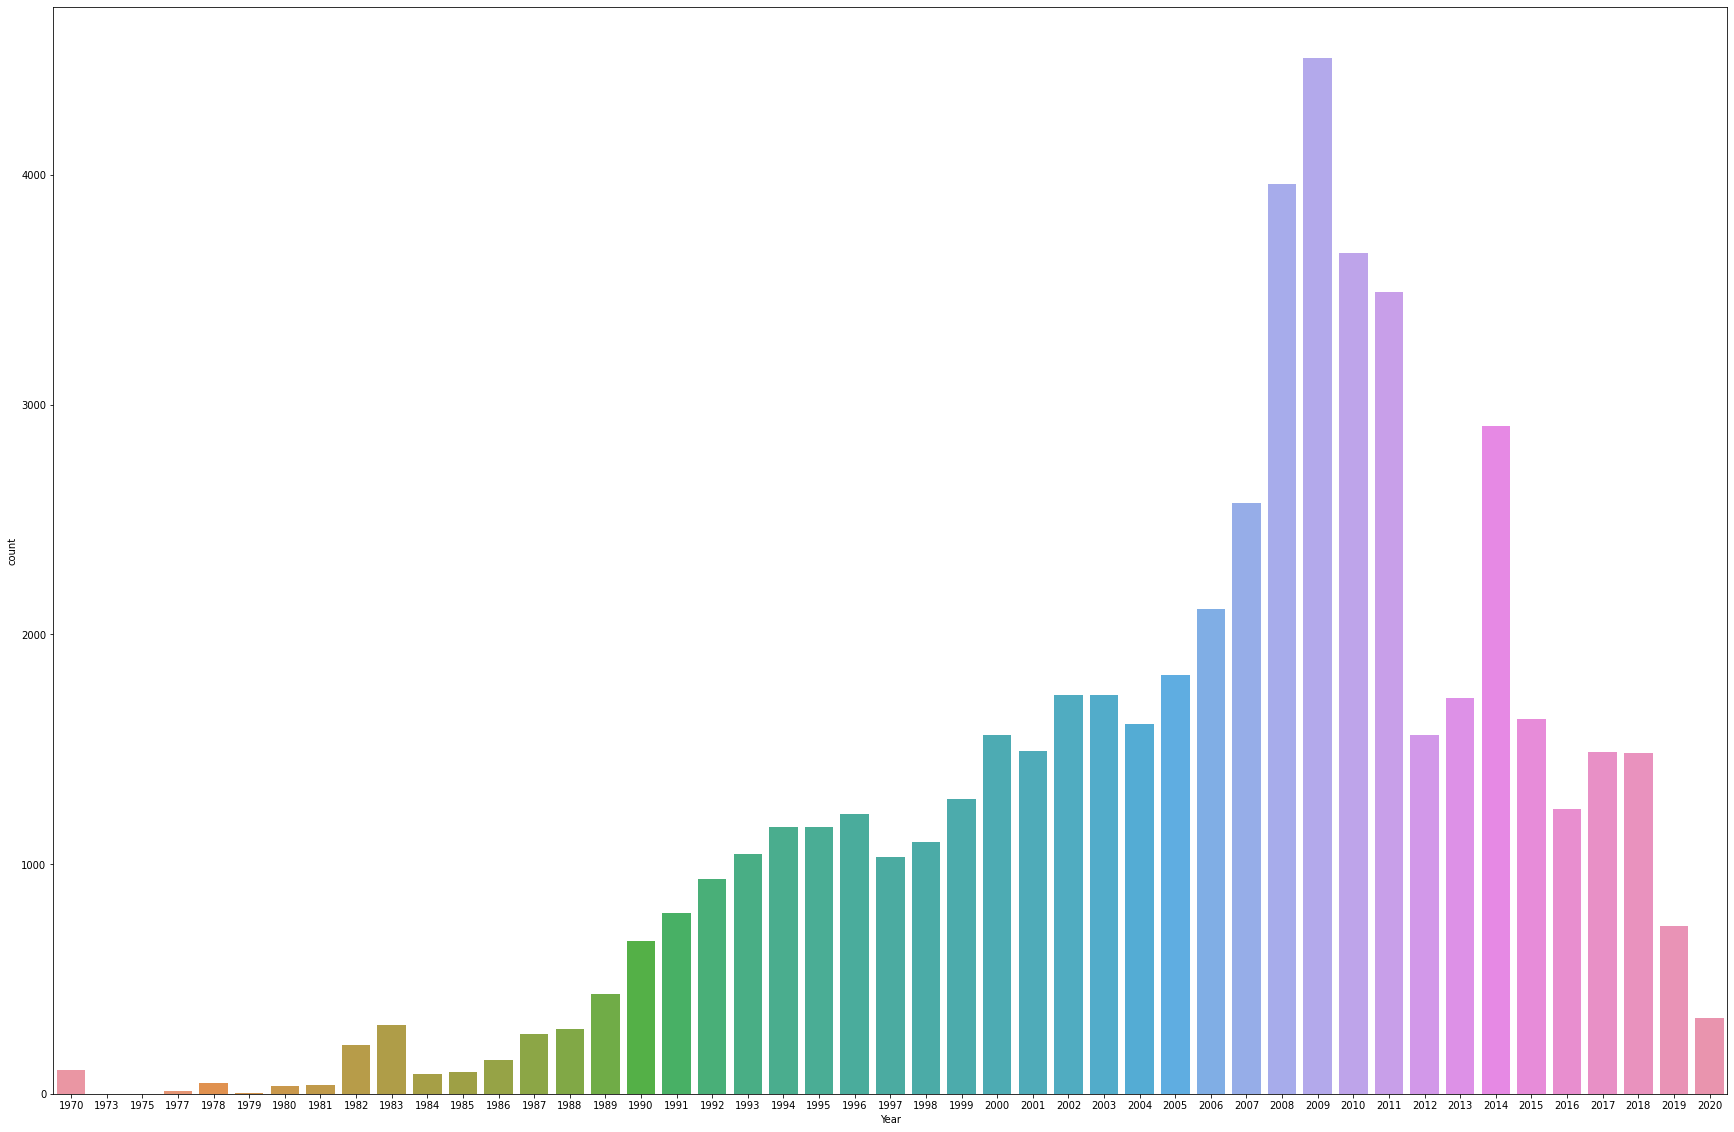

In [1107]:
f, ax = plt.subplots(figsize=(30,20))
sns.countplot(x="Year", data=df_clean)

Comme il n'est pas très visible et que nous souhaitons une forme un peu plus gaussienne pour notre modèle.

Nous allons enlever les jeux dont l'année de sortie est inférieure aux années 2000. Nous allons donc nous concentrer sur les générations plus récentes des jeux vidéos à partir des années 2000. 

In [1108]:
df_clean = df_clean.query("Year>=2000")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43347 entries, 0 to 55791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          43347 non-null  int64  
 1   Name          43347 non-null  object 
 2   Genre         43347 non-null  object 
 3   Platform      43347 non-null  object 
 4   Publisher     43347 non-null  object 
 5   Developer     43347 non-null  object 
 6   Critic_Score  43347 non-null  float64
 7   Global_Sales  43347 non-null  float64
 8   Year          43347 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 3.3+ MB


Il nous reste 43 347 jeux dans notre dataset. 

Il n'y a donc pas beaucoup de données supprimées sur les 55 792 jeux que l'on avaient au départ. 

Cela peut en effet s'expliquer par l'évolution de la popularité des jeux vidéos qui n'a cessée de grandir, surtout à partir des années 2000.

<AxesSubplot:xlabel='Year', ylabel='count'>

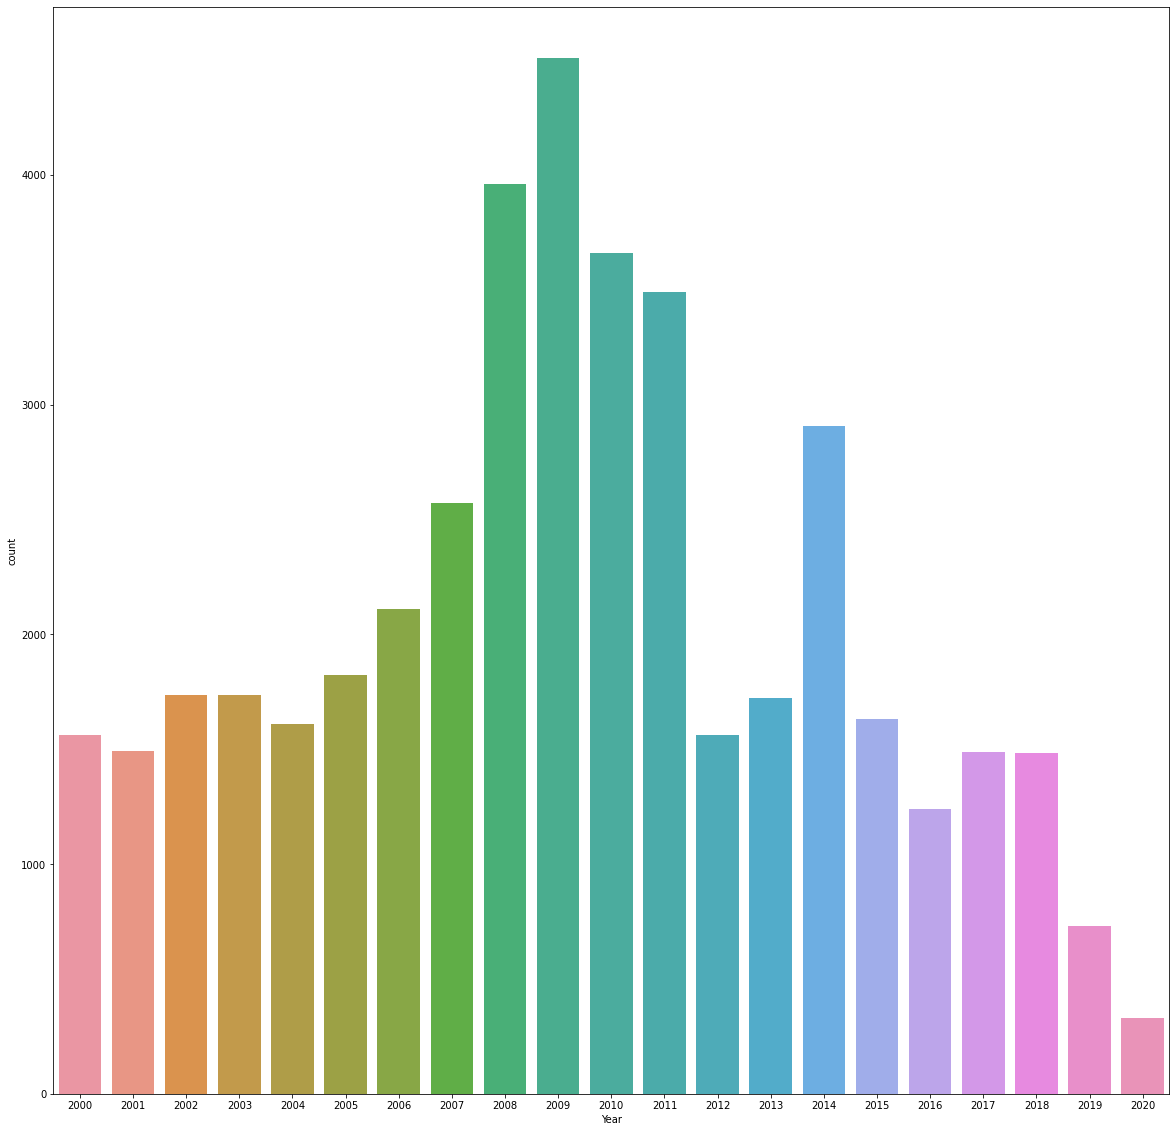

In [1109]:
f, ax = plt.subplots(figsize=(20,20))
sns.countplot(x="Year", data=df_clean)

Affichons maintenant la répartition des jeux vidéos selon leur genre.

<AxesSubplot:ylabel='Genre'>

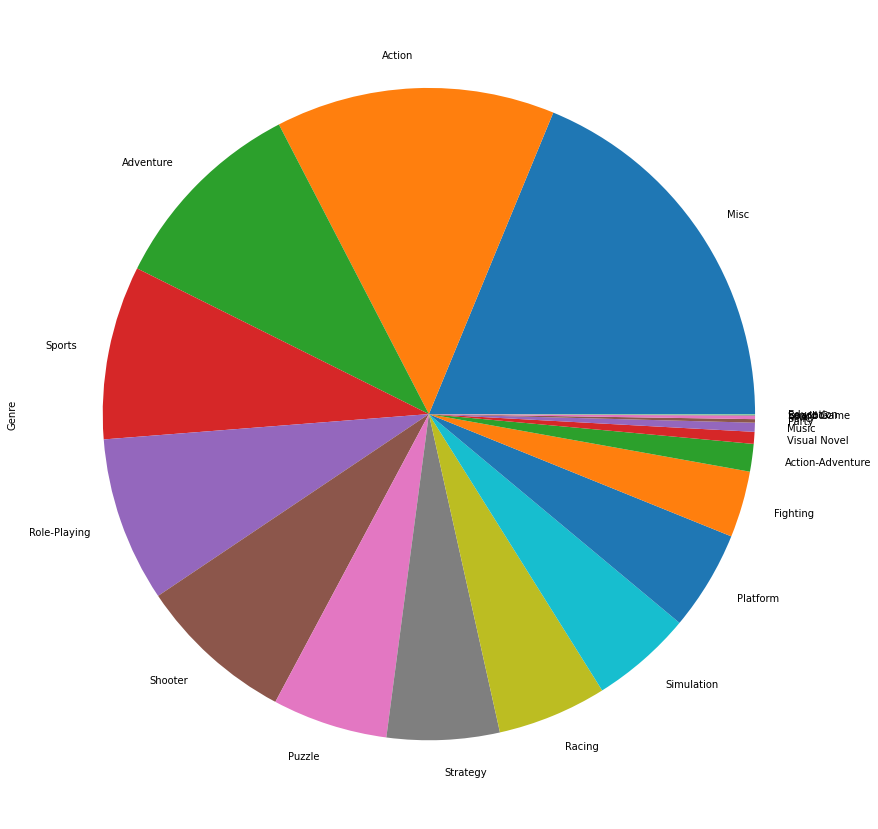

In [1110]:
f, ax = plt.subplots(figsize=(30,15))
df_clean.Genre.value_counts().plot(kind = 'pie')

Pour que ce graphe devienne plus visible, nous allons regrouper les jeux ayant les genres les moins représentés en les placant dans une catégorie 'Autres'.

In [1111]:
list_genre = df_clean.Genre.value_counts()
list_genre

Misc                8137
Action              5997
Adventure           4345
Sports              3731
Role-Playing        3542
Shooter             3377
Puzzle              2478
Strategy            2419
Racing              2348
Simulation          2181
Platform            2141
Fighting            1426
Action-Adventure     593
Visual Novel         256
Music                194
Party                 75
MMO                   74
Board Game            16
Sandbox                9
Education              8
Name: Genre, dtype: int64

Nous pouvons voir que les genres les moins représentés sont :

- 'Visual Novel'
- 'Music'
- 'Party'
- 'MMO'
- 'Board Game'
- 'Sandbox'
- 'Education'

Remplaçons-les par la catégorie 'Autres'.

In [1112]:
#Remplacement des catégories sélectionnées par 'Autres'
df_clean['Genre'] = df_clean['Genre'].replace(['Party', 'Music', 'MMO', 'Sandbox', 'Visual Novel', 'Board Game', 'Education'], 'Autres')

list_genre = df_clean.Genre.value_counts()
list_genre


<ipython-input-1112-fd371b8641c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Genre'] = df_clean['Genre'].replace(['Party', 'Music', 'MMO', 'Sandbox', 'Visual Novel', 'Board Game', 'Education'], 'Autres')


Misc                8137
Action              5997
Adventure           4345
Sports              3731
Role-Playing        3542
Shooter             3377
Puzzle              2478
Strategy            2419
Racing              2348
Simulation          2181
Platform            2141
Fighting            1426
Autres               632
Action-Adventure     593
Name: Genre, dtype: int64

On réaffiche ensuite le graphe précédent.

<AxesSubplot:ylabel='Genre'>

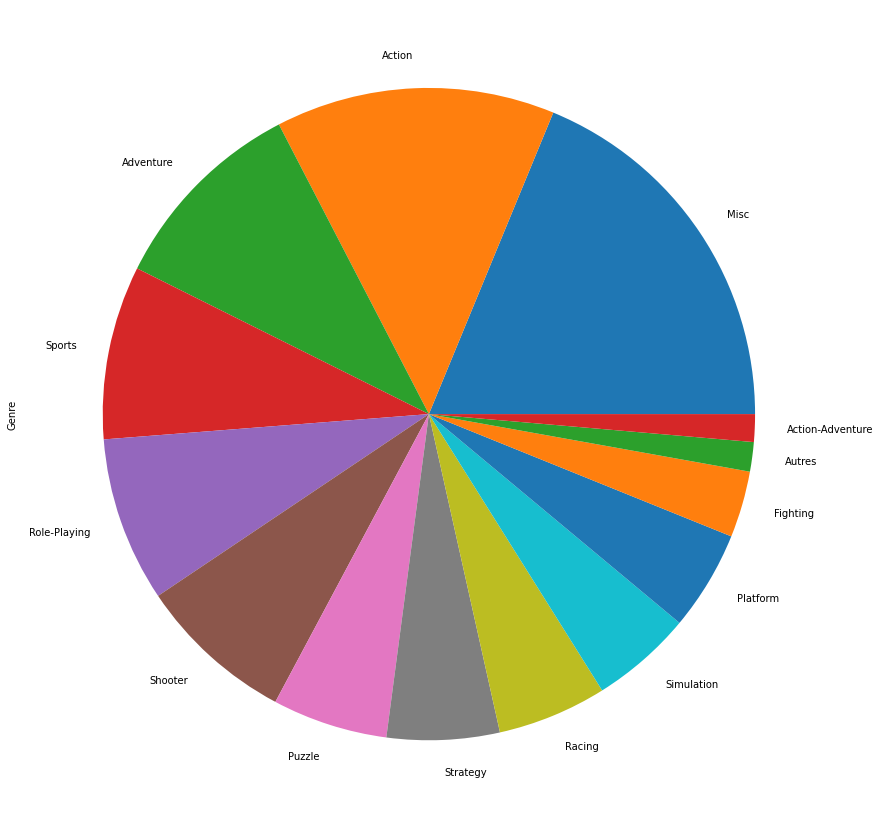

In [1113]:
f, ax = plt.subplots(figsize=(30,15))
df_clean.Genre.value_counts().plot(kind = 'pie')

Regardons également avec ce graphe la répartition des supports utilisés par les jeux de notre dataset.

<AxesSubplot:ylabel='Platform'>

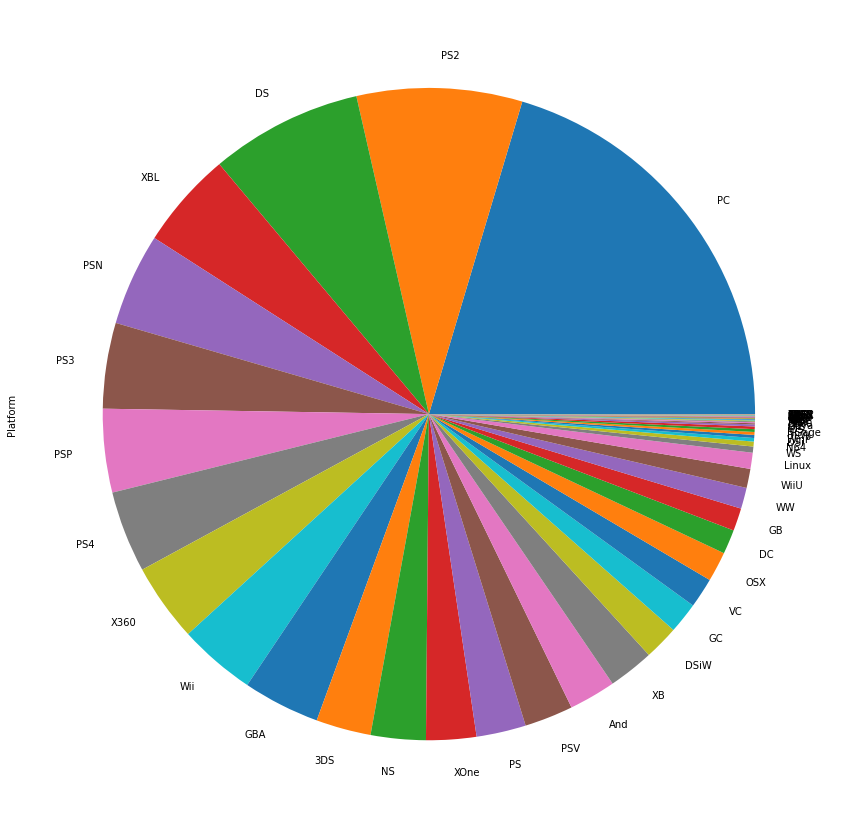

In [1114]:
f, ax = plt.subplots(figsize=(30,15))
df_clean.Platform.value_counts().plot(kind = 'pie')

Ici, même procédé que pour la colonne 'Genre'.

In [1115]:
list_platform = df_clean.Platform.value_counts()

list_platform.tail(33)

WS       132
N64      105
DSi       76
WinP      66
BRW       62
NGage     60
iOS       57
GIZ       43
Ouya      25
2600      22
NG        19
Arc       17
Mob       16
iQue      14
NES       14
GBC       11
MS        10
Int        9
SCD        8
Lynx       8
AJ         8
GEN        8
SNES       6
PCFX       5
Amig       5
SAT        3
5200       2
3DO        2
MSD        2
S32X       2
CD32       1
ZXS        1
7800       1
Name: Platform, dtype: int64

In [1116]:
df_clean['Platform'] = df_clean['Platform'].replace(['WS', 'N64', 'DSi', 'WinP', 'BRW', 'NGage', 'iOS', 'GIZ', 'Ouya', '2600', 'NG', 'Arc', 'Mob', 'iQue', 'NES', 'GBC', 'MS', 'Int', 'SCD', 'Lynx', 'AJ', 'GEN', 'SNES', 'PCFX', 'Amig', 'SAT', '5200', '3DO', 'MSD', 'S32X', 'CD32', 'ZXS', '7800'], 'Autres')

list_platform = df_clean.Platform.value_counts()
list_platform


<ipython-input-1116-17b621ce6015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Platform'] = df_clean['Platform'].replace(['WS', 'N64', 'DSi', 'WinP', 'BRW', 'NGage', 'iOS', 'GIZ', 'Ouya', '2600', 'NG', 'Arc', 'Mob', 'iQue', 'NES', 'GBC', 'MS', 'Int', 'SCD', 'Lynx', 'AJ', 'GEN', 'SNES', 'PCFX', 'Amig', 'SAT', '5200', '3DO', 'MSD', 'S32X', 'CD32', 'ZXS', '7800'], 'Autres')


PC        8833
PS2       3552
DS        3266
XBL       2088
PSN       1980
PS3       1840
PSP       1792
PS4       1753
X360      1676
Wii       1655
GBA       1653
3DS       1180
NS        1180
XOne      1076
PS        1064
PSV       1044
And       1006
XB         978
Autres     820
DSiW       742
GC         663
VC         645
OSX        642
DC         523
GB         488
WW         452
WiiU       410
Linux      346
Name: Platform, dtype: int64

<AxesSubplot:ylabel='Platform'>

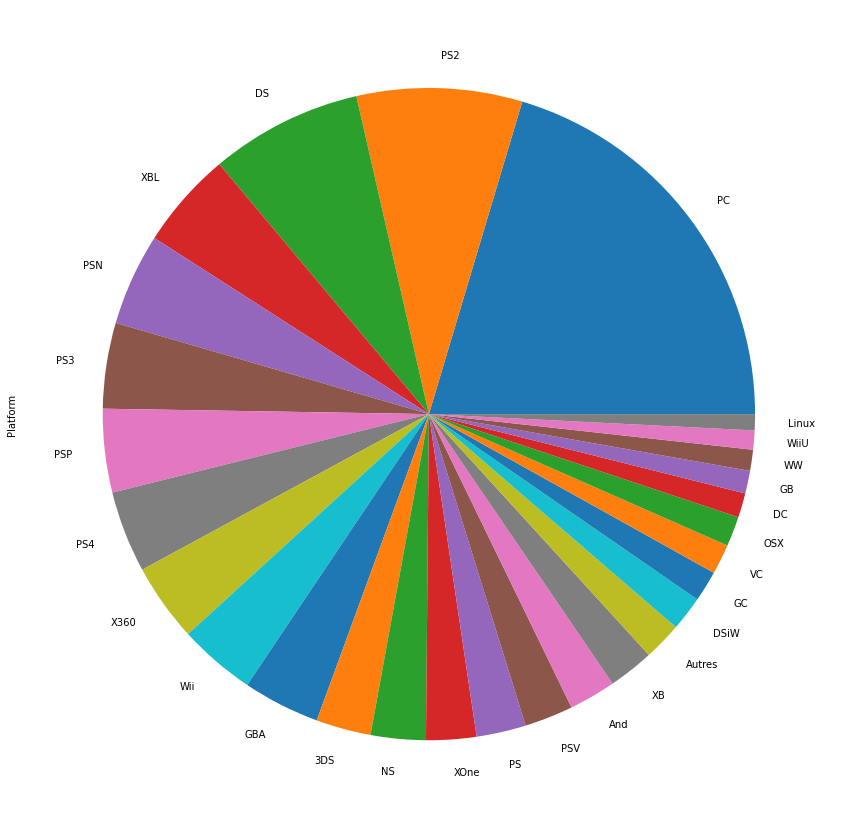

In [1117]:
f, ax = plt.subplots(figsize=(30,15))
df_clean.Platform.value_counts().plot(kind = 'pie')

On remarque que le support le plus populaire pour les jeux vidéos est le PC.

Avec les colonnes 'Publisher' et 'Developer', il y a trop de données uniques pour pouvoir afficher un graphique visible. On va donc supprimer ces colonnes pour le reste de notre analyse.

In [1118]:
#Suppression des colonnes 'Publisher' et 'Developer'
df_clean = df_clean.drop(['Publisher', 'Developer'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43347 entries, 0 to 55791
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          43347 non-null  int64  
 1   Name          43347 non-null  object 
 2   Genre         43347 non-null  object 
 3   Platform      43347 non-null  object 
 4   Critic_Score  43347 non-null  float64
 5   Global_Sales  43347 non-null  float64
 6   Year          43347 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ MB


Maintenant, regardons la disposition de chaque genre de jeu vidéo selon leur rang avec un graphe de boîte à moustache.

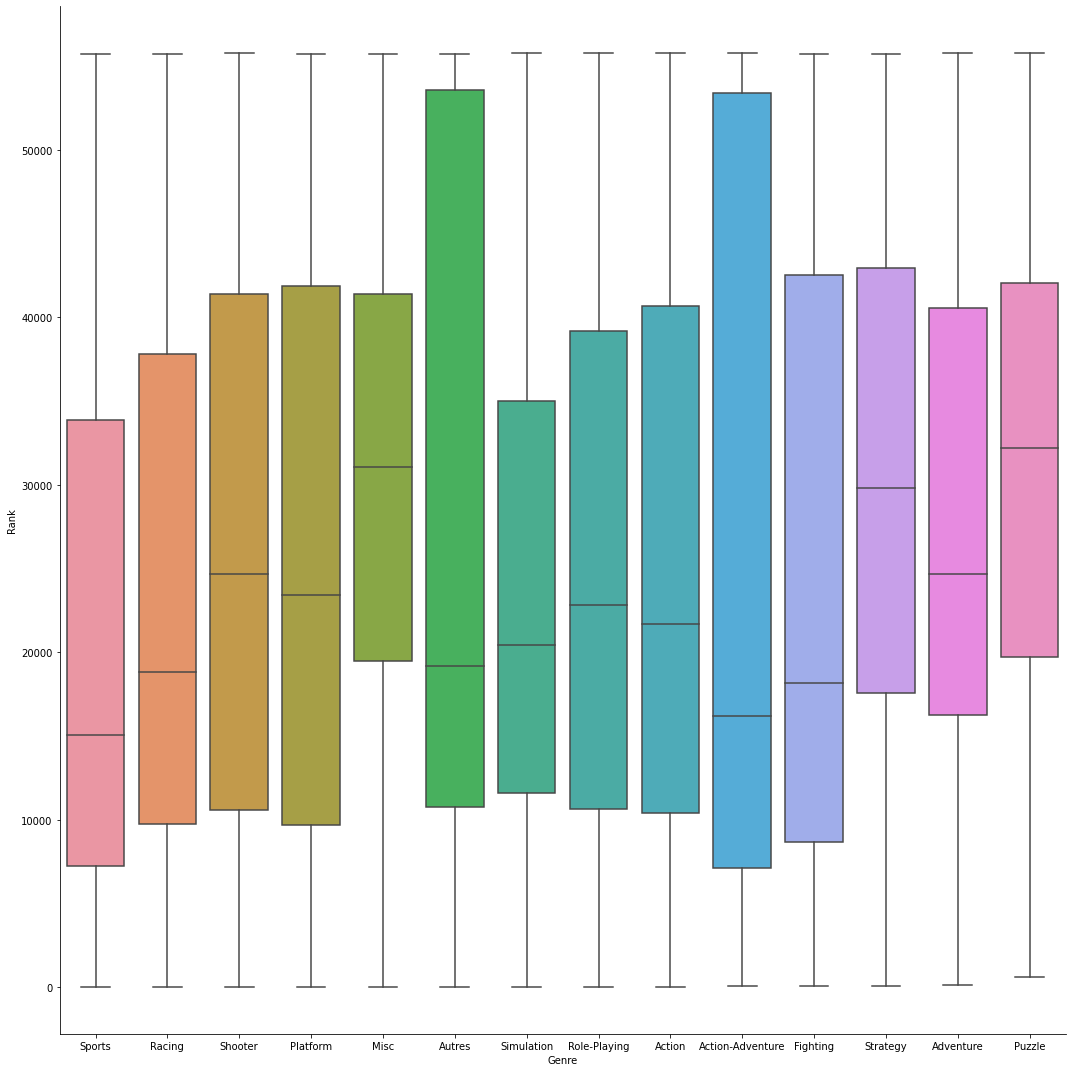

In [1119]:
sns.catplot(x='Genre', y= 'Rank',kind='box', data=df_clean, height=15)

Nous pouvons remaquer qu'il n'y a aucune valeurs aberrantes à observer dans ce graphe.

Changeons donc notre variable x par la colonne 'Platform' et voyons ce qu'il se passe.

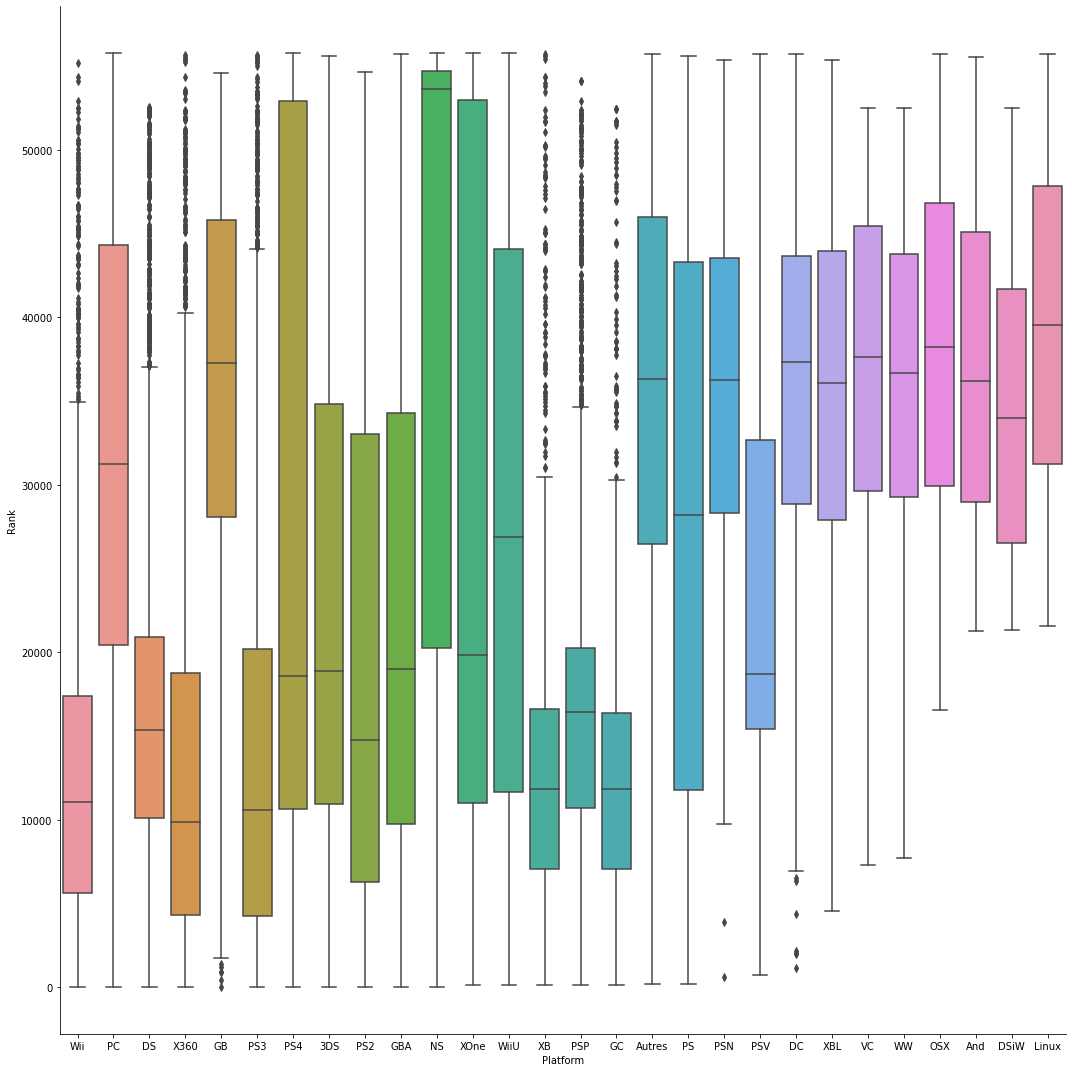

In [1120]:
sns.catplot(x='Platform', y= 'Rank',kind='box', data=df_clean, height=15)

Ici, nous pouvons bien observer des valeurs extrêmes dans la répartition du rang de certains supports de jeux vidéos.

Ensuite, nous allons encoder nos colonnes 'Genre' et 'Platform' pour pouvoir les représenter dans la matrice de corrélation de notre dataframe.

In [1121]:
from sklearn.preprocessing import LabelEncoder

encoder_genre = LabelEncoder().fit_transform(df_clean['Genre'].tolist())
df_clean['Genre'] = encoder_genre

encoder_platform = LabelEncoder().fit_transform(df_clean['Platform'].tolist())
df_clean['Platform'] = encoder_platform

df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43347 entries, 0 to 55791
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          43347 non-null  int64  
 1   Name          43347 non-null  object 
 2   Genre         43347 non-null  int64  
 3   Platform      43347 non-null  int64  
 4   Critic_Score  43347 non-null  float64
 5   Global_Sales  43347 non-null  float64
 6   Year          43347 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 3.9+ MB


,Rank,Name,Genre,Platform,Critic_Score,Global_Sales,Year
0,1,Wii Sports,12,22,7.7,0.12,2006
2,3,Mario Kart Wii,8,22,8.2,0.12,2008
3,4,PlayerUnknown's Battlegrounds,10,12,7.5,0.12,2017
4,5,Wii Sports Resort,12,22,8.0,0.12,2009
6,7,New Super Mario Bros.,6,4,9.1,0.12,2006


Affichage de la heatmap avec les coefficients de la matrice de corrélation du dataframe.

<AxesSubplot:>

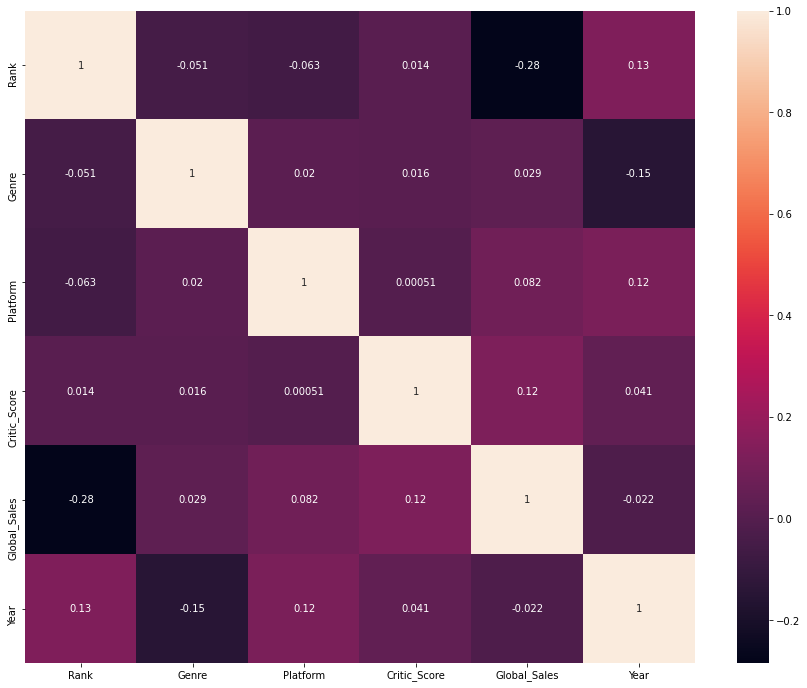

In [1122]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_clean.corr(), annot=True)

On peut également réafficher le pairplot du début pour une meilleure visualisation.

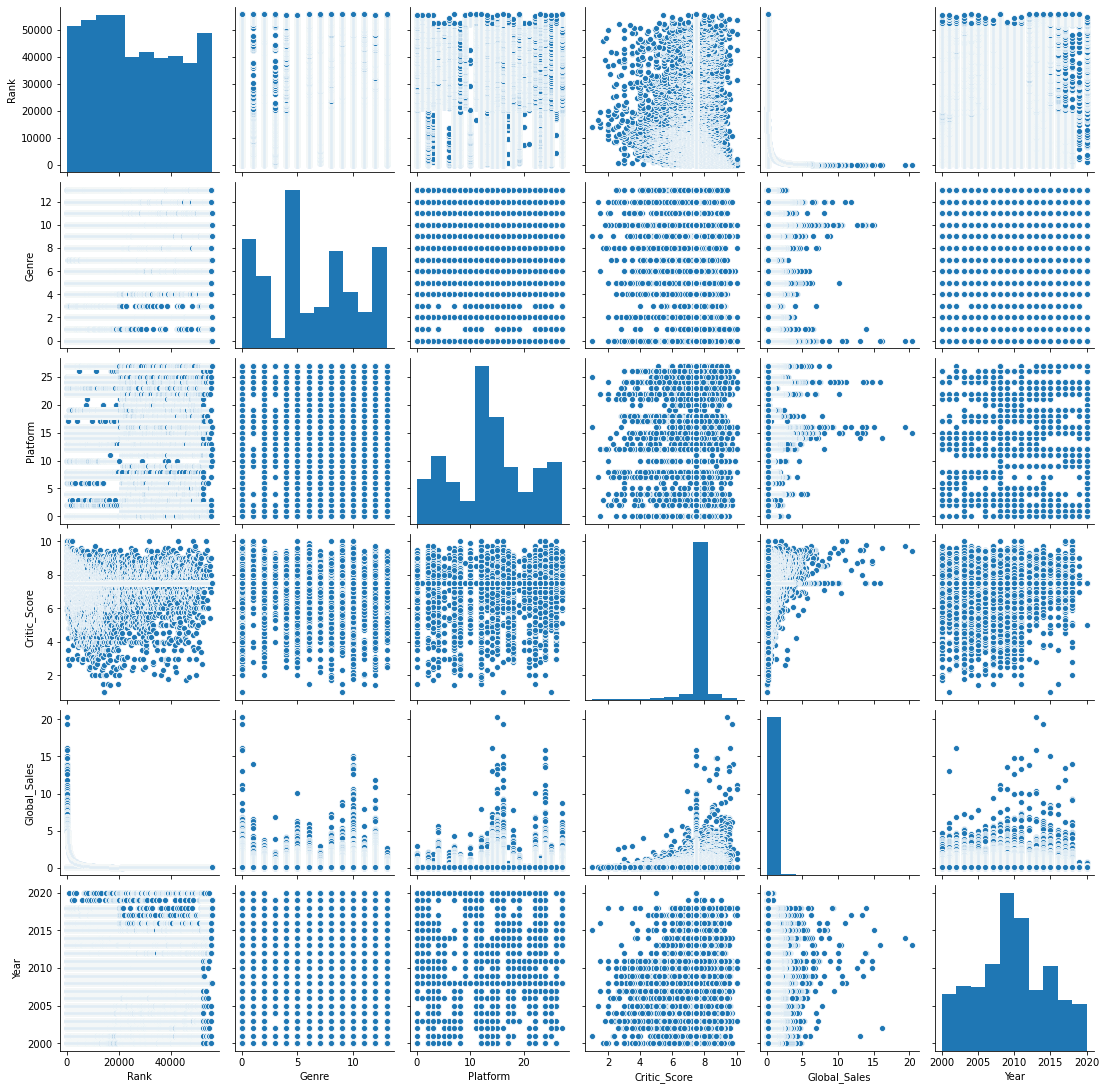

In [1123]:
sns.pairplot(df_clean)

## Question à définir : quel est le but du modèle ?

Après ces observations, l'objectif de notre modèle sera donc de prédire les ventes mondiales d'un jeu vidéo.

Target : Global_Sales

Features à garder : Genre, Platform, Critic_Score, Year 

Nous pouvons remarquer que le rang possède un coefficient négatif avec les ventes mondiales (devrait être positif puisque plus les ventes mondiales sont élevées plus le jeu vidéo est bien classé) mais comme le classement se fait de manière décroissante, c'est donc également inversé. 

## Partie 2 : Model Building
- 3 algorithmes avec 3 paramètres différents (ex: max_depth, n_estimators,….)
- Affichage des coefficients/ accuracy
- Sélection du meilleur paramétrage
- Le model est-il en overfitting/underfitting/OK ?

Définissons les variables X et Y

In [1124]:
Y = df_clean['Global_Sales']
X = df_clean[['Genre', 'Platform', 'Critic_Score', 'Year']]
print(X.shape)
print(Y.shape)

(43347, 4)
(43347,)


Splittons ces variables en données d'entraînement et de test.

In [1125]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (30342, 4)
Y_train shape: (30342,)
X_test shape: (13005, 4)
Y_test shape: (13005,)


### Linear Regression

Utilisons un modèle de régression linéaire pour ce jeu de données puisque nous avons des données assez éparses.

In [1126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
regr.fit(X_train, Y_train)
print('Coefficients beta_j: \n', regr.coef_)
print('Coefficients intercept beta_0: \n', regr.intercept_)

Y_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)
print("taille du vecteur Y_pred : ", Y_pred.size)
print("taille du vecteur Y_test_pred : ", Y_test_pred.size)

print("Mean squared error : Train = %.3f, Test = %.3f" % (
        mean_squared_error(Y_train, Y_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print("R2 : Train = %.3f, Test = %.3f" % (
        r2_score(Y_train, Y_pred),
        r2_score(Y_test, Y_test_pred)))

Coefficients beta_j: 
 [ 0.0025153   0.00656708  0.13601817 -0.00378449]
Coefficients intercept beta_0: 
 6.698692413279892
taille du vecteur Y_pred :  30342
taille du vecteur Y_test_pred :  13005
Mean squared error : Train = 0.303, Test = 0.276
R2 : Train = 0.025, Test = 0.020


### Cross Validation

Reproduisons ce modèle avec un random_state différent sur 45 itérations.

In [1127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

sc_y = StandardScaler()
sc_x = StandardScaler()

y_std = sc_y.fit_transform(Y_train[:, np.newaxis]).flatten()

train_score = []
test_score = []

for i in range(45):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))



In [1128]:
print(train_score)
print(test_score)

[0.02155741 0.02210778 0.02472044 0.02384671 0.02446031 0.0249034
 0.02222938 0.02428637 0.02278654 0.02268684 0.02271267 0.02223332
 0.02274143 0.02464213 0.02371795 0.02429372 0.02437698 0.02469098
 0.02329323 0.02299725 0.02220412 0.02336511 0.02255255 0.0230782
 0.02302584 0.02524041 0.02350762 0.0223692  0.02480337 0.02350726
 0.02679494 0.02236576 0.02347442 0.02339723 0.02444345 0.0246087
 0.02382621 0.02312302 0.02665769 0.02577468 0.0241266  0.02302293
 0.02544143 0.02337038 0.02583966]
[0.02825678 0.0263806  0.02181574 0.02371112 0.02262586 0.02143265
 0.02566254 0.02285006 0.02670566 0.02715125 0.02583635 0.02655556
 0.02693862 0.02217478 0.02428562 0.02309779 0.02164208 0.02243582
 0.02534153 0.02548351 0.02816838 0.02513746 0.02662537 0.02453233
 0.02599303 0.02125396 0.02438884 0.02618252 0.02189121 0.02476089
 0.01782698 0.02786393 0.02446159 0.02500466 0.02258048 0.02233997
 0.02412514 0.02514208 0.01570081 0.01974655 0.02279599 0.02587481
 0.019684   0.02495324 0.01996

In [1129]:
print("Meilleur score en Train :", max(train_score),"avec un random_state =", np.argmax(train_score))
print("Meilleur score en Test :", max(test_score),"avec un random_state =", np.argmax(test_score))

print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

Meilleur score en Train : 0.026794940611875817 avec un random_state = 30
Meilleur score en Test : 0.028256779649891484 avec un random_state = 0
R2 train: 0.024 +/- 0.001
R2 test: 0.024 +/- 0.003


## Partie 3 : Features Importance
- Affichage sous forme de barplot

[ 0.0025153   0.00656708  0.13601817 -0.00378449]


<BarContainer object of 4 artists>

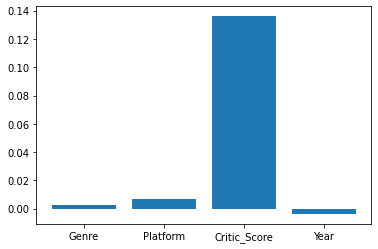

In [1130]:
features = ["Genre", "Platform", "Critic_Score", "Year"]
print(regr.coef_)
plt.bar(features, regr.coef_)

On peut bien voir que l'année n'est pas trop important pour prédire les ventes mondiales.

Le plus important semble être les notes données par les critiques aux jeux pour déterminer le montant des ventes mondiales.

## Partie 4 : Model Réexécution avec les features sélectionnés
- Affichage des coefficients/ accuracy

On supprime donc la colonne 'Year' et voyons ce qui se passe avec le modèle.

In [1131]:
X = X.drop(['Year'], axis=1)

X.shape

(43347, 3)

In [1132]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (30342, 3)
Y_train shape: (30342,)
X_test shape: (13005, 3)
Y_test shape: (13005,)


In [1133]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
regr.fit(X_train, Y_train)
print('Coefficients beta_j: \n', regr.coef_)
print('Coefficients intercept beta_0: \n', regr.intercept_)

Y_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)
print("taille du vecteur Y_pred : ", Y_pred.size)
print("taille du vecteur Y_test_pred : ", Y_test_pred.size)

print("Mean squared error : Train = %.3f, Test = %.3f" % (
        mean_squared_error(Y_train, Y_pred),
        mean_squared_error(Y_test, Y_test_pred)))
print("R2 : Train = %.3f, Test = %.3f" % (
        r2_score(Y_train, Y_pred),
        r2_score(Y_test, Y_test_pred)))

Coefficients beta_j: 
 [0.00318649 0.00625413 0.13449508]
Coefficients intercept beta_0: 
 -0.8939585917921996
taille du vecteur Y_pred :  30342
taille du vecteur Y_test_pred :  13005
Mean squared error : Train = 0.303, Test = 0.276
R2 : Train = 0.024, Test = 0.019


In [1134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

sc_y = StandardScaler()
sc_x = StandardScaler()

y_std = sc_y.fit_transform(Y_train[:, np.newaxis]).flatten()

train_score = []
test_score = []

for i in range(45):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=3)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))


In [1135]:
print("Train Score :", train_score)
print("Test Score :", test_score)

Train Score : [0.02060887 0.02094022 0.02404315 0.02276249 0.02340336 0.02384985
 0.02096904 0.02326875 0.02155276 0.02173419 0.02147418 0.0213354
 0.02198831 0.02333473 0.0226879  0.02329251 0.02360119 0.02351323
 0.02228255 0.02201281 0.02103777 0.02223453 0.0214682  0.02227406
 0.02201706 0.02399835 0.0221453  0.02147748 0.02298982 0.02258585
 0.02538829 0.02159446 0.02220425 0.02249507 0.02315281 0.02357317
 0.02283063 0.02160971 0.02571926 0.0245234  0.02313746 0.02206242
 0.02436404 0.02218903 0.02440914]
Test Score : [0.02690475 0.02542275 0.01994626 0.02260482 0.02146377 0.02025031
 0.02486419 0.02158279 0.02602473 0.02570198 0.02501844 0.02515095
 0.02505303 0.02161384 0.02304777 0.02183354 0.01954515 0.02150787
 0.02401621 0.02419046 0.02728222 0.02414511 0.02552457 0.02302084
 0.02470328 0.02044525 0.02388053 0.02478167 0.02214426 0.02330181
 0.01744058 0.02603165 0.02372428 0.02352207 0.02193799 0.02112661
 0.02282968 0.02500116 0.0142016  0.01900573 0.0213991  0.02451028
 

In [1136]:
print("Meilleur score en Train :", max(train_score),"avec un random_state =", np.argmax(train_score))
print("Meilleur score en Test :", max(test_score),"avec un random_state =", np.argmax(test_score))

print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

Meilleur score en Train : 0.025719263521703173 avec un random_state = 38
Meilleur score en Test : 0.027282219985948708 avec un random_state = 20
R2 train: 0.023 +/- 0.001
R2 test: 0.023 +/- 0.003


En conclusion, ce modèle est insuffisant pour prédire les ventes de jeu vidéo de manière précise. 

Il est en underfitting car nos données de base étaient déjà très incomplètes au niveau des ventes mondiales et des notes des crtiques. On a donc eu besoin de remplir avec des valeurs moyennes ce qui ne représente pas assez la réalité. 

Pour pouvoir améliorer ce modèle, il nous faudrait des données de départ plus complètes surtout pour les colonnes 'Global_Sales' et 'Critic_Score' qui sont les plus corrélées.